<a href="https://colab.research.google.com/github/SaxenaVaishnavi/Machine-Learning-Practices/blob/main/Mock_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [35]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, SGDRegressor, SGDClassifier, Lasso, Perceptron
from sklearn.metrics import r2_score, mean_absolute_error, precision_score, log_loss, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Pre-Processing

## Data Import

In [73]:
data = pd.read_csv('/content/preprocessing_data.csv')

In [3]:
data.head()

,Gender,Age,HasTension,AnyHeartDisease,NeverMarried,Occupation,LivesIn,GlucoseLevel,BMI,SmokingStatus,HeartAttack
0,Female,75.0,Yes,No,Yes,Self-employed,City,54.6,35.1,never smoked,No
1,Female,49.0,No,No,Yes,Private,Village,108.8,26.7,smokes,No
2,Male,32.0,No,No,Yes,Private,City,64.1,23.4,smokes,No
3,Male,78.0,No,No,Yes,Self-employed,City,219.2,27.4,Unknown,Yes
4,Male,39.0,No,No,Yes,Private,City,55.4,41.6,formerly smoked,No


In [9]:
data.shape

(4000, 11)

## Ques 1.
What is the total number of missing or unknown values in the column Gender?

In [4]:
data['Gender'].unique()

array(['Female', 'Male', 'Unknown'], dtype=object)

In [12]:
data[data['Gender'] == 'Unknown'].shape

(7, 11)

## Ques 2.
What is the total number of missing or unknown values in the column Age?

In [13]:
data['Age'].unique()

array([ 7.50e+01,  4.90e+01,  3.20e+01,  7.80e+01,  3.90e+01, -3.00e+00,
        6.30e+01,  4.00e+00,  4.50e+01,  5.20e+01,  3.10e+01,  5.70e+01,
        5.60e+01,  2.00e+01,  2.40e-01,  3.80e+01,  8.20e+01,  3.40e+01,
        2.90e+01,  1.60e+01,  7.00e+00,  3.70e+01,  5.10e+01,  2.60e+01,
        5.30e+01,  5.00e+01,  2.00e+00,  5.40e+01,  7.90e+01,  6.00e+00,
        5.80e+01,  6.50e+01,  1.30e+01,  4.70e+01,  1.90e+01,  7.40e+01,
        7.30e+01,  1.20e+01,  9.00e+00,  2.70e+01,  3.30e+01,  8.10e+01,
        3.60e+01,  7.60e+01,  7.10e+01,  4.60e+01,  2.50e+01,  1.70e+01,
        2.20e+01,  1.10e+01,  5.50e+01,  6.10e+01,  6.90e+01,  7.70e+01,
        4.20e+01,  2.40e+01,  7.20e+01,  3.50e+01,  8.00e+01,  1.64e+00,
        5.90e+01,  6.00e+01,  4.10e+01,  4.30e+01,  6.20e+01,  6.40e+01,
        5.00e+00,  7.00e+01,  2.10e+01,  1.00e+01,  1.80e+01,  1.40e+01,
        4.00e+01,  1.50e+01,  3.00e+00,  4.80e+01,  8.00e+00,  1.32e+00,
        6.70e+01,  4.40e+01,  6.80e+01,  1.56e+00, 

In [14]:
data[data['Age'] < 0].shape

(8, 11)

## Ques 3.
What is the total number of missing or unknown values in the column GlucoseLevel?

In [15]:
data['GlucoseLevel'].unique()

array([ 54.6, 108.8,  64.1, ..., 218.9,  66.3, 168.5])

In [16]:
data[data['GlucoseLevel'] < 0].shape

(9, 11)

## Ques 4.
What is the total number of missing or unknown values in the column LivesIn?

In [17]:
data['LivesIn'].unique()

array(['City', 'Village', 'Unknown'], dtype=object)

In [18]:
data[data['LivesIn'] == 'Unknown'].shape

(5, 11)

## Ques 5.
What is the total number of missing or unknown values in the column BMI?

In [19]:
data['BMI'].unique()

array([35.1, 26.7, 23.4, 27.4, 41.6, 29.3, 37.1, 16.1, 40.5, 15.8, 29.9,
       29.5, 40.7, 36.6, 31.5,  nan, 12.1, 25.5, 22.3, 27.1, 44.7, 26.1,
       18.8, 18.7, 24.8, 17. , 37.6, 20.6, 29. , 56.2, 30.7, 25.3, 23. ,
       27.2, 19.2, 31.6, 24.6, 27. , 24.5, 18.2, 52. , 32.3, 42.7, 30. ,
       24.3, 24.2, 25.7, 36.7, 46.4, 48.3, 20.9, 24.7, 23.6, 26.5, 39.4,
       18.4, 25.6, 25.9, 54.6, 31.9, 14.6, 38.7, 23.7, 27.3, 29.2, 39.7,
       30.1, 28.1, 35.7, 14.3, 30.4, 22.2, 35. , 44.5, 36.3, 25.2, 26.6,
       31.4, 36.8, 25.8, 38.4, 43.2, 20.4, 30.6, 33.8, 34. , 26.2, 29.6,
       30.2, 22.9, 38.9, 16.3, 23.3, 25.1, 34.1, 45.7, 37.3, 26.4, 40.9,
       31.1, 17.7, 27.5, 19.9, 32. , 35.9, 32.1, 24.9, 23.8, 18. , 20.7,
       27.7, 22.6, 13.1, 19.4, 28.5, 28.8, 21.7, 19.6, 27.8, 41. , 41.8,
       35.2, 44.4, 42.6, 15.7, 52.8, 23.1, 38.5, 22.7, 18.3, 42.3, 43.4,
       51.5, 24. , 28.7, 23.9, 37.9, 32.6, 35.6, 34.7, 28.3, 33.2, 32.5,
       44.1, 34.2, 22. , 33.3, 16.8, 35.4, 20.1, 26

In [21]:
data['BMI'].isna().sum()

np.int64(149)

## Ques 6.
What is the total number of missing or unknown values in the column SmokingStatus?

In [22]:
data['SmokingStatus'].unique()

array(['never smoked', 'smokes', 'Unknown', 'formerly smoked'],
      dtype=object)

In [23]:
data[data['SmokingStatus'] == 'Unknown'].shape

(1204, 11)

## Ques 7.
What is the mean value of the BMI in the dataset? Ignore the missing values if any

In [24]:
data['BMI'].mean()

np.float64(28.857958971695663)

## Ques 8.
How many people live in city, smoked at least once in life and had a heartattack? Ignore records/rows with any missing values.

In [48]:
data[
    (data["LivesIn"] == "City") &
    (data["SmokingStatus"].isin(["formerly smoked", "smokes"])) &
    (data["HeartAttack"] == "Yes")
].shape

(52, 11)

## Ques 9.
Which of the following categories have highest frequency? Ignore rows with missing values.

- female patients without tension, without any heart disease and never married
- female patients without tension, without any heart disease and either currently married or married before
- male patients without tension, without any heart disease and never married
- male patients with tension, with a heart disease and never married

In [51]:
# female patients without tension, without any heart disease and never married
data[
    (data['Gender'] == 'Female') &
    (data['HasTension'] == 'No') &
    (data['AnyHeartDisease'] == 'No') &
    (data['NeverMarried'] == 'Yes')
].shape

(1335, 11)

In [52]:
# female patients without tension, without any heart disease and either currently married or married before
data[
    (data['Gender'] == 'Female') &
    (data['HasTension'] == 'No') &
    (data['AnyHeartDisease'] == 'No') &
    (data['NeverMarried'] == 'No')
].shape

(754, 11)

In [54]:
# male patients without tension, without any heart disease and never married
data[
    (data['Gender'] == 'Male') &
    (data['HasTension'] == 'No') &
    (data['AnyHeartDisease'] == 'No') &
    (data['NeverMarried'] == 'Yes')
].shape

(795, 11)

In [55]:
# male patients with tension, with a heart disease and never married
data[
    (data['Gender'] == 'Male') &
    (data['HasTension'] == 'Yes') &
    (data['AnyHeartDisease'] == 'Yes') &
    (data['NeverMarried'] == 'Yes')
].shape

(24, 11)

## Ques 10
Select columns with categorical values :
- Gender
- BMI
- NeverMarried
- SmokingStatus
- GlucoseLevel
- HeartAttack

In [59]:
print(data['Gender'].dtype)
print(data['BMI'].dtype)
print(data['NeverMarried'].dtype)
print(data['SmokingStatus'].dtype)
print(data['GlucoseLevel'].dtype)
print(data['HeartAttack'].dtype)

object
float64
object
object
float64
object


## Ques 11.
`HeartAttack` is the target column. What is the distribution count of "No" and "Yes" classes?

In [61]:
target = data['HeartAttack']
target.value_counts()

,count
HeartAttack,
No,3806
Yes,194


## Ques 12.

- Divide the data into training and test sets. Keep 30% of the data as test set.
  - Use `random_state = 0`
  - `HeartAttack` is the target
  - rest of the columns are the features.

- For the label/target vector, replace "Yes" with 1 and "No" with 0.
- Divide the dataset into training and test sets keeping target(y) in stratified manner.
- Prepare a data preprocessing pipeline to process features in following order:

  - Gender: Impute with most frequent then ordinally encode.
  - Age: Impute with mean then standard scale.
  - HasTension: Ordinally encode.
  - AnyHeartDisease:Ordinally encode.
  - NeverMarried:Ordinally encode.
  - Occupation: One hot encode.
  - LivesIn: Impute with most frequent then ordinally encode.
  - GlucoseLevel: Impute with mean, then min-max scaling.
  - BMI: Impute with mean, then standard scale.
  - SmokingStatus: Impute with most frequent, then one hot encode

Hint: After transformation, your feature matrix must have columns in following order:

0. Gender
1. Age
2. HasTension
3. AnyHeartDisease
4. NeverMarried
5. Occupation_Govt_job
6. Occupation_Never_worked
7. Occupation_Private
8. Occupation_Self-employed
9. Occupation_children
10. LivesIn
11. GlucoseLevel
12. BMI
13. SmokingStatus_formerly smoked
14. SmokingStatus_never smoked
15. SmokingStatus_smokes

NOTE:
Make sure to preprocess the features in the above order exactly. Answer(s) of later question(s) depend(s) upon correct order of featuring processing.
You may have to use multiple instances of a trasnformer for this question.

Calculate the shape of the feature matrix of training dataset.

In [67]:
from os import pipe
# Removing target variable from features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Mapping categorical target values to numerical values
y.map({'Yes' : 1, 'No' : 0})

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Defining individual column pipelines
pipe_gender = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OrdinalEncoder())
])

pipe_age = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('encoder', StandardScaler())
])

pipe_tension = Pipeline([
    ('encoder', OrdinalEncoder())
])

pipe_heartdisease = Pipeline([
    ('encoder', OrdinalEncoder())
])

pipe_nevermarried = Pipeline([
    ('encoder', OrdinalEncoder())
])

pipe_occupation = Pipeline([
    ('encoder', OneHotEncoder())
])

pipe_livesin = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OrdinalEncoder())
])

pipe_glucose = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', MinMaxScaler())
])

pipe_bmi = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
])

pipe_smoking = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder())
])

# Transforming cols according to their pipelines
preprocessor = ColumnTransformer([
    ('gender', pipe_gender, ['Gender']),
    ('age', pipe_age, ['Age']),
    ('tension', pipe_tension, ['HasTension']),
    ('heartdisease', pipe_heartdisease, ['AnyHeartDisease']),
    ('nevermarried', pipe_nevermarried, ['NeverMarried']),
    ('occupation', pipe_occupation, ['Occupation']),
    ('livesin', pipe_livesin, ['LivesIn']),
    ('glucose', pipe_glucose, ['GlucoseLevel']),
    ('bmi', pipe_bmi, ['BMI']),
    ('smoking', pipe_smoking, ['SmokingStatus'])
])

# Applying transformation on training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Final shape after preprocessing
X_train_transformed.shape

(2800, 17)

# Regression

## Data Import

In [74]:
data = pd.read_csv('/content/regression_data.csv')

In [75]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.087472,0.002829,1.768235,0.188396,0.117071,0.148148,0.478165,0.720443,0.967195,0.281563,0.428571,0.959596,1.0,0.0,23.358097
1,0.378379,0.022079,1.115629,0.091974,0.066089,0.851852,0.911759,0.785321,0.885001,0.424648,0.285714,0.868687,0.0,1.0,17.268768
2,0.066901,0.003828,-0.536262,0.221188,0.255671,0.296296,0.228024,0.406472,0.980184,0.274376,0.428571,0.767677,0.0,1.0,27.776974
3,0.140645,0.011132,1.323366,0.422514,0.153103,0.148148,0.410679,0.200319,0.861371,0.305006,0.142857,0.848485,0.0,1.0,16.121960
4,0.144225,0.204918,-0.930790,0.148694,0.177490,0.259259,0.146832,0.111429,0.983448,0.286322,0.285714,0.616162,1.0,0.0,23.129426


## Common data setup
- The file has no index column.
- The last column is the target column.
- The first row of the file has column ids

Split the dataset into train dataset and test dataset in the following manner:
- Use `train_test_split` to split the dataset into train and test dataset with test size equal to 0.3(i.e.30%) and `random_state` equal to 42.
- Let other parameters have default values.
- Columns except the last column should be the feature matrix (`X_train` or `X_test`).
- Last column will be the label vector.

In [76]:
# Defining features and target column
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Ques 1.
Train the ridge model on the training data with the following parameters:

```python
alpha = 10
solver = 'saga'
tol = 1e-4
random_state = 42
```

Enter the value of $R^2$ score on the test dataset.

In [77]:
ridge = Ridge(alpha=10, solver='saga', tol=1e-4, random_state=42)     # Model defination
ridge.fit(X_train, y_train)                                           # Model training
y_pred = ridge.predict(X_test)                                        # Predictions
r2_score(y_test, y_pred)

0.6613547575262211

## Ques 2.
What is the index of most and least important feature? Note the index starts from 0. Ignore the intercept for this question.


In [116]:
print('Most important feature: ', np.argmax(abs(ridge.coef_)))
print('Least important feature: ', np.argmin(abs(ridge.coef_)))

Most important feature:  9
Least important feature:  0


In [118]:
ridge.coef_

array([ -0.4825441 ,   3.74601838,  -0.73583331,   0.54199933,
        -9.89014109,   5.80114296,  -5.06099736,  -9.45015598,
         4.73124885, -23.51321982,  11.31863371,   0.49450664,
        -0.89196134,   0.89196134])

## Ques 3.
Take `SGDRegressor(random_state = 42)` estimator with `GridSearchCV`.

Hyperparameter tuning to be done over the following parameters:
- penalty as ['l1', 'l2']
- alpha values as [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
- values of tol as [1e-4, 1e-3, 1e-2, 1e-1]
- Use cross-validation = 5
- Set scoring as `neg_mean_absolute_error`

Use the best model from above hyper parameter tuning process to answer following questions:

What is the best penalty?


In [85]:
# Model definition
sgd = SGDRegressor(random_state=42)

# HPT
param_grid = {
    'penalty': ['l1', 'l2'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1],
}

grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(random_state=42),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'penalty': ['l1', 'l2'],
                         'tol': [0.0001, 0.001, 0.01, 0.1]},
             scoring='neg_mean_absolute_error')

In [90]:
grid_search.best_params_

{'alpha': 0.001, 'penalty': 'l2', 'tol': 0.0001}

## Ques 4.
What will be value of mean absolute error on the test dataset?

In [93]:
y_pred = grid_search.best_estimator_.predict(X_test)
mean_absolute_error(y_test, y_pred)

3.8131121797994014

## Ques 5.

- Create a `pipeline` of the `PCA()` as transformer and `Lasso` as an estimator.
- Use `GridSearchCV` for tuning the hyperparameters of the created pipeline on training dataset.

	- Values of n_components for PCA to be [0.9, 0.95]
	- lasso alpha value to be taken as : [10, 1, 0.01, 0.001]
	- scoring : neg_mean_absolute_error.
	- Use 5 fold cross validation.
	- n_jobs = -1 (negative one) [it helps in using all the computational power to run this job]

**Note**: Kindly ignore the warning.

If we fit the pipeline on the training dataset, what will be the R2 score on the test dataset?

In [102]:
pipe = Pipeline([
    ('transformer', PCA()),
    ('estimator', Lasso())
])

param_grid = {
    'transformer__n_components': [0.9, 0.95],
    'estimator__alpha': [10, 1, 0.01, 0.001]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer', PCA()),
                                       ('estimator', Lasso())]),
             n_jobs=-1,
             param_grid={'estimator__alpha': [10, 1, 0.01, 0.001],
                         'transformer__n_components': [0.9, 0.95]},
             scoring='neg_mean_absolute_error')

In [103]:
y_pred = grid_search.best_estimator_.predict(X_test)
r2_score(y_test, y_pred)

0.6288625430197575

## Ques 6.
How much variance is explained (Eigen value) by the first principle component?

In [106]:
grid_search.best_estimator_['transformer'].explained_variance_

array([1.16350757, 0.15109745, 0.11321585, 0.07019734, 0.03866388,
       0.02770669, 0.02515772])

# Classification

## Data Import

In [2]:
data = pd.read_csv('/content/classification_data.csv')
data.head()

,Gender,Age,HasTension,AnyHeartDisease,NeverMarried,Occupation_Govt_job,Occupation_Never_worked,Occupation_Private,Occupation_Self-employed,Occupation_children,LivesIn,GlucoseLevel,BMI,SmokingStatus_formerly smoked,SmokingStatus_never smoked,SmokingStatus_smokes,HeartAttack
0,0.0,0.433901,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.203263,0.284421,0.0,1.0,0.0,0
1,1.0,-1.840435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.386014,-1.186687,0.0,1.0,0.0,0
2,1.0,-1.160260,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.326807,0.065045,0.0,1.0,0.0,0
3,1.0,-0.806002,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.182284,0.929643,0.0,1.0,0.0,0
4,0.0,0.743876,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.200466,-0.412420,0.0,0.0,1.0,1


- The last column is the target column.
- Last 30% rows of the dataset constitute test set and remaining rows form the training set.
- Do not shuffle the dataset while splitting
- You must have to use only training set to train all the estimator in questions below.
- First row of the file has column names/ids, and it has no index column.


In [3]:
# Splitting data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

## Ques 1.
Instantiate a perceptron classifier that with following parameters:
```python
random_state = 1729
learning rate = 1
Train for appropriate number of iterations
Do not shuffle the dataset for each iteration.
Include the intercept (bias) term.
Use 10% of the data for validation fraction.
Do not apply regularization.
Set warm start to true.
```
**Hint**: one iteration of training indicates going over each sample exactly once.

Train the classifier on the training data.


Train the perceptron classifier for 5 iterations. What is value of bias (intercept) after 5th iteration?

In [19]:
clf = Perceptron(random_state=1729,
                 eta0=1,
                 max_iter=1,
                 shuffle=False,
                 fit_intercept=True,
                 validation_fraction=0.1,
                 penalty=None,
                 warm_start=True)
for i in range(5):
  clf.partial_fit(X_train, y_train, classes=y.unique())

clf.intercept_

array([-3.])

## Ques 2.

In continuation of the previous question, compute precision accurate upto 2 decimal places on training data for positive class (i.e. class value 1), after 5 iterations.

**Hint**: Use estimator trained from the previous question

In [23]:
y_pred = clf.predict(X_train)
precision = precision_score(y_train, y_pred)
precision

0.6666666666666666

## Ques 3.
Train (on training data only) logistic regression using SGDClassifier. Use the following parameters:

```python
Choose appropriate loss value to obtain logistic regression
penalty='l2',
eta0=0.001,
alpha=0,
learning_rate='constant'
random_state=1729.
warm_start = True
```

Train the classifier for 5 iterations and note the value of the loss in each iteration. What will be the loss value after second iteration? Answer upto three decimal places.

**Note**: Set the remaining parameters, if any, accordingly to be able to get the loss value after second iteration. Also note that the classifier has to be trained for 5 iterations.

In [28]:
clf = SGDClassifier(loss='log_loss',
                    max_iter=1,
                    eta0=0.001,
                    penalty='l2',
                    alpha=0,
                    learning_rate='constant',
                    random_state=1729,
                    warm_start=True)
loss = []
iterations = 5

for i in range(iterations):
  clf.partial_fit(X_train, y_train, classes=y.unique())
  y_pred = clf.predict_proba(X_train)
  loss.append(log_loss(y_train, y_pred))

loss

[0.2529904609012919,
 0.20828682141739835,
 0.19406901833322654,
 0.18699850891012404,
 0.18255077295024025]

## Ques 4.
Use GridSearchCV with SGDClassifier. Following are the classifier's parameters:

```python
loss = 'log_loss'
learning_rate = 'constant'
random_state = 1729
```

Following are parameters to examine:

```python
alpha = [0.0001, 0.0005, 0.001, 0.005]
eta0 = [0.01, 0.05, 0.1, 0.5]
```

What are the best values of alpha and eta0 respectively?

In [30]:
clf = SGDClassifier(loss='log_loss',
                    learning_rate='constant',
                    random_state=1729)
param_grid = {
    'alpha': [0.0001, 0.0005, 0.001, 0.005],
    'eta0': [0.01, 0.05, 0.1, 0.5]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'alpha': 0.0001, 'eta0': 0.01}

## Ques 5.
Create a new estimator using `SGDClassifier` that uses the best parameters obtained in Gridsearch earlier

```python
learning rate to be constant
random_state to be '1729
use appropriate loss for logistic regression
set the weight of class 0 to be 0.1 and the weight of class 1 to be 2
```
How many samples of class 1 from the test set are correctly predicted by this estimator?

In [32]:
clf = SGDClassifier(loss='log_loss',
                    eta0=0.01,
                    alpha=0.0001,
                    learning_rate='constant',
                    random_state=1729,
                    class_weight={0: 0.1, 1: 2})

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

idx_1 = np.where(y_test == 1)
np.sum(y_pred[idx_1] == 1)

np.int64(47)

## Ques 6.
Fit an SVM classifier with following parameters:

```python
kernel='rbf'
decision_function_shape='ovr'
random_state=1729
C=1
```

Train the model on training data, and print the confusion matrix on test data.

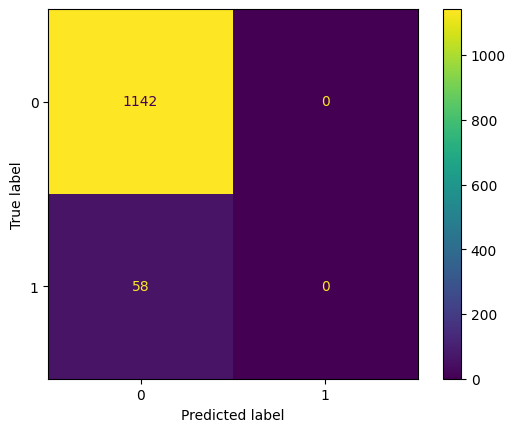

In [44]:
clf = SVC(kernel='rbf',
          decision_function_shape='ovr',
          random_state=1729,
          C=1)

clf.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

## Ques 7.
Train a Decision Tree Classifier with the following properties:

```python
criterion = 'entropy',
splitter = 'random',
min_samples_split = 4,
min_impurity_decrease = 0.0001,
random_state = 1729
```

What is the resultant depth of the tree?

In [59]:
clf = DecisionTreeClassifier(criterion='entropy',
                             splitter='random',
                             min_samples_split=4,
                             min_impurity_decrease=0.0001,
                             random_state=1729)
clf.fit(X_train, y_train)
# clf.tree_.max_depth
clf.get_depth()

20

## Ques 8.
How many nodes are there in the tree?

In [53]:
clf.tree_.node_count

515

In [54]:
? clf

In [56]:
import sklearn
help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : intp_t
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : intp_t
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : intp_t
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of intp_t, shape [node_count]
 |      children_left[i] holds the node id of the

## Ques 9.
What is the value of entropy at the left child of root?

In [60]:
left_child_root_idx = clf.tree_.children_left[0]
clf.tree_.impurity[left_child_root_idx]

np.float64(0.024564134553940277)